In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use with our MSE loss

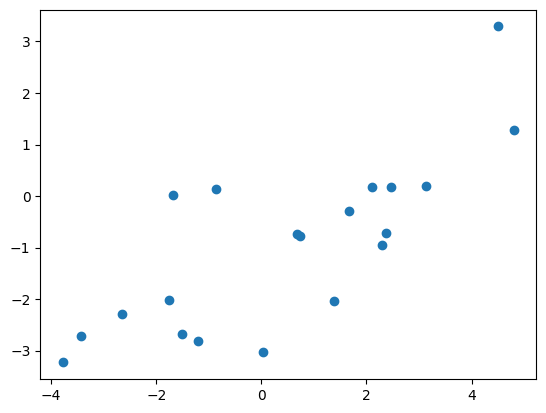

In [14]:
# Plot the data
plt.scatter(X, Y);

In [15]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [16]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [17]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [18]:
type(inputs)

torch.Tensor

In [19]:
# Train the model
n_epochs = 40
losses = []
for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # keep the loss so we can plot it later
    losses.append(loss.item())

    # Backward and optimize
    loss.backward()
    optimizer.step()
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/40, Loss: 9.1744
Epoch 2/40, Loss: 2.9697
Epoch 3/40, Loss: 1.9507
Epoch 4/40, Loss: 1.6931
Epoch 5/40, Loss: 1.5642
Epoch 6/40, Loss: 1.4705
Epoch 7/40, Loss: 1.3955
Epoch 8/40, Loss: 1.3344
Epoch 9/40, Loss: 1.2845
Epoch 10/40, Loss: 1.2437
Epoch 11/40, Loss: 1.2104
Epoch 12/40, Loss: 1.1831
Epoch 13/40, Loss: 1.1609
Epoch 14/40, Loss: 1.1427
Epoch 15/40, Loss: 1.1278
Epoch 16/40, Loss: 1.1156
Epoch 17/40, Loss: 1.1057
Epoch 18/40, Loss: 1.0975
Epoch 19/40, Loss: 1.0909
Epoch 20/40, Loss: 1.0854
Epoch 21/40, Loss: 1.0810
Epoch 22/40, Loss: 1.0774
Epoch 23/40, Loss: 1.0744
Epoch 24/40, Loss: 1.0720
Epoch 25/40, Loss: 1.0700
Epoch 26/40, Loss: 1.0684
Epoch 27/40, Loss: 1.0670
Epoch 28/40, Loss: 1.0659
Epoch 29/40, Loss: 1.0651
Epoch 30/40, Loss: 1.0643
Epoch 31/40, Loss: 1.0637
Epoch 32/40, Loss: 1.0633
Epoch 33/40, Loss: 1.0629
Epoch 34/40, Loss: 1.0625
Epoch 35/40, Loss: 1.0623
Epoch 36/40, Loss: 1.0621
Epoch 37/40, Loss: 1.0619
Epoch 38/40, Loss: 1.0617
Epoch 39/40, Loss: 1.

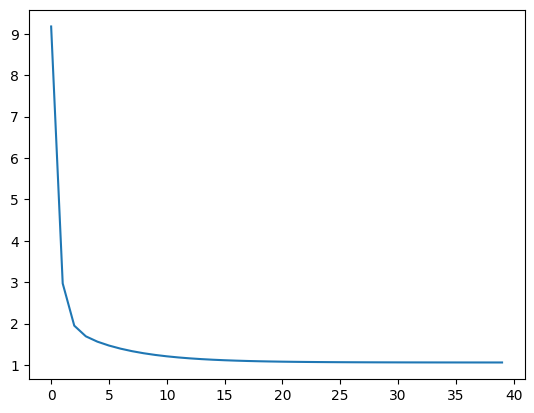

In [20]:
# Plot the loss per iteration
plt.plot(losses);

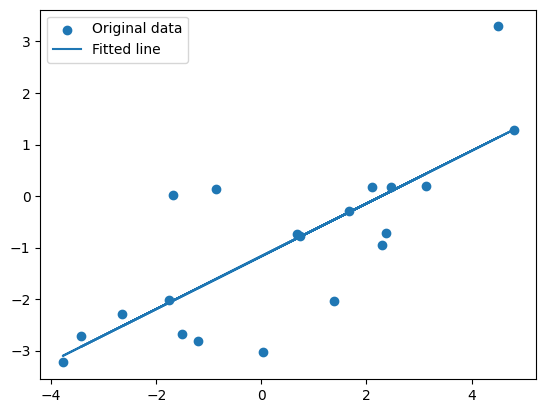

In [21]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [26]:
predicted

array([[-4.6058714e-01],
       [-9.2684150e-02],
       [-2.5220079e+00],
       [ 4.6881080e-02],
       [-1.1497878e+00],
       [-1.7887702e+00],
       [ 1.1390107e+00],
       [-2.0686407e+00],
       [-2.0245743e+00],
       [-3.1721920e-01],
       [ 1.9302368e-03],
       [-3.1023202e+00],
       [-8.1758589e-01],
       [ 1.2876232e+00],
       [-7.9104602e-01],
       [-1.9429986e+00],
       [-2.9280400e+00],
       [ 9.0491772e-02],
       [ 4.3785238e-01],
       [-1.6072166e+00]], dtype=float32)

In [23]:
# Error!
model(inputs).numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [24]:
# Another way
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-4.6058714e-01],
       [-9.2684150e-02],
       [-2.5220079e+00],
       [ 4.6881080e-02],
       [-1.1497878e+00],
       [-1.7887702e+00],
       [ 1.1390107e+00],
       [-2.0686407e+00],
       [-2.0245743e+00],
       [-3.1721920e-01],
       [ 1.9302368e-03],
       [-3.1023202e+00],
       [-8.1758589e-01],
       [ 1.2876232e+00],
       [-7.9104602e-01],
       [-1.9429986e+00],
       [-2.9280400e+00],
       [ 9.0491772e-02],
       [ 4.3785238e-01],
       [-1.6072166e+00]], dtype=float32)

In [25]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.51163125]] [-1.168791]
